In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")

df.head()

,t,x,y,z,vx,vy,vz,u
0,0.0,0.666667,0.666667,0.666667,2.466000,-0.260497,0.952542,0
1,0.0,1.333330,0.666667,0.666667,-0.180133,1.349310,-0.875124,0
2,0.0,2.000000,0.666667,0.666667,-0.255070,0.286395,-1.887350,0
3,0.0,2.666670,0.666667,0.666667,1.424920,2.844180,1.857890,0
4,0.0,3.333330,0.666667,0.666667,0.078474,0.150112,1.809080,0


In [35]:
df['r'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
df['v'] = np.sqrt(df['vx']**2 + df['vy']**2 + df['vz']**2)
df['r2'] = df['x']**2 + df['y']**2 + df['z']**2
df['v2'] = df['vx']**2 + df['vy']**2 + df['vz']**2

df.head()

,t,x,y,z,vx,vy,vz,u,r,v,r2,v2
0,0.0,0.666667,0.666667,0.666667,2.466000,-0.260497,0.952542,0,1.154701,2.656379,1.333335,7.056351
1,0.0,1.333330,0.666667,0.666667,-0.180133,1.349310,-0.875124,0,1.632991,1.618310,2.666659,2.618927
2,0.0,2.000000,0.666667,0.666667,-0.255070,0.286395,-1.887350,0,2.211083,1.925921,4.888890,3.709173
3,0.0,2.666670,0.666667,0.666667,1.424920,2.844180,1.857890,0,2.828430,3.683953,8.000019,13.571512
4,0.0,3.333330,0.666667,0.666667,0.078474,0.150112,1.809080,0,3.464099,1.816993,11.999979,3.301462


In [37]:
df_bytimestep = df.groupby('t', as_index=False)[['v2']].mean()
df_bytimestep['T'] = df_bytimestep['v2']/(3)
df_bytimestep.head()

,t,v2,T
0,0.000,7.647460,2.549153
1,0.001,107.335796,35.778599
2,0.002,343.098757,114.366252
3,0.003,630.628643,210.209548
4,0.004,930.693792,310.231264


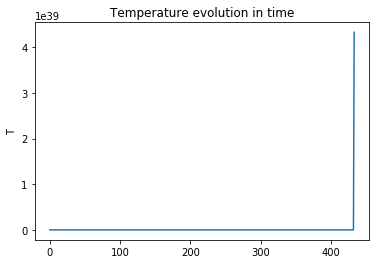

In [38]:
%matplotlib inline

df_bytimestep['T'].plot()
plt.title("Temperature evolution in time")
plt.ylim(0,3.5)
plt.ylabel("T");

In [5]:
T_prom = df_bytimestep['T'].iloc[2000:].mean()

K = 10000
den = 0
for i in range(K):
    den += (df_bytimestep['T'].iloc[i] - T_prom)**2
    
def corr(k, a, a_prom):
    num = 0
    for i in range(K-k):
        num += (a.iloc[i] - a_prom)*(a.iloc[i+k] - a_prom)
    return num

corr_T = []
for i in range(K):
    c = corr(i, df_bytimestep['T'], T_prom)/den
    corr_T.append(c)


KeyboardInterrupt: 

In [6]:
df_bytimestep['CT'] = corr_T
df_bytimestep.head()

,t,v2,T,CT
0,0.000,7.357877,2.452626,1.000000
1,0.001,7.376122,2.458707,0.990159
2,0.002,7.363807,2.454602,0.979078
3,0.003,7.321732,2.440577,0.966767
4,0.004,7.251612,2.417204,0.953261


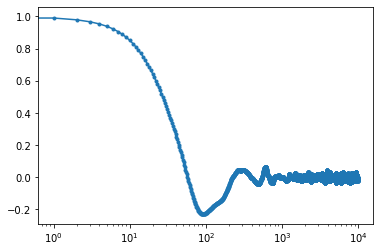

In [9]:
df_bytimestep['CT'].plot(marker='.')
plt.xscale('log')